In [139]:
import numpy as np
import math
from pprint import pprint
from itertools import permutations

In [161]:
import itertools
import pylab
import matplotlib.path
import matplotlib.pyplot as plt

## Параметры 

In [173]:
LIMIT_DISTANCE = 10  #см. Это диаметр маркера
EPS = 0.5 #см. Насколько точно рамка определяет положение ножек маркера?

## класс курсора-вектора

точка с координатами x, y

- __add__ сложение векторов


- __sub__ вычитание


- __repr__ вывод


- length расстояние от начала координат


- unit_vector единичный вектор


In [296]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    # function to add two vectors
    def __add__(self, other):
        return Vector(self.x+other.x, self.y+other.y)

    # function to subtract vectors
    def __sub__(self, other):
        return Vector(self.x-other.x, self.y-other.y)

    # make the vector printable
    def __repr__(self):
        return "x: %s y: %s" % (self.x, self.y)
    
    # calculate distance from (0,0)
    def length(self):
        return np.linalg.norm([self.x, self.y])
    
    # calc unit vector
    def unit_vector(self):
        length = self.length()
        return Vector(self.x/length, self.y/length)

### вспомогательные функции для работы с геометрией

- distance(p1, p2) вычисление длины по двум точкам


- dot_product(v1, v2) скалярное произведение


- calc_angle(p1, p2) расчет угла между v1 и v2 в радианах


- rotate_vector (vec, angle) вращение вектора


- clockwise_difference_between_angles(original_angle, changed_angle) вычисление разницы между углами в радианах


- is_point_in_circle(center, radius, point) проверка попадания ОДНОЙ ТОЧКИ в окружность радиуса радиус с центром в указанных точках

In [148]:
UNIT_VECTOR = Vector(0, 1)

In [301]:
# function to calculate the distance between two points
def distance(p1, p2):
    dist = np.linalg.norm([p2.x - p1.x, p2.y - p1.y])
    return dist

def dot_product(v1, v2):
    return np.dot([v1.x, v1.y], [v2.x, v2.y])

#returns the angle in radians between vectors 'v1' and 'v2'
def calc_angle(v1, v2, deg=False):
    print('Первый вектор:', v1)
    print('Второй вектор:', v2)
    radians = np.arccos(np.clip(dot_product(v1.unit_vector(), v2.unit_vector()), -1.0, 1.0))
    result = radians
    print('радианы:', result)
    if deg:
        result = np.degrees([radians.real])[0]  # переводим в градусы
    return result

# function to rotate a vector by a certain angle
def rotate_vector(vec, angle, deg=False):
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    rotated_vector = Vector(vec.x*cos_angle - vec.y*sin_angle, vec.x*sin_angle + vec.y*cos_angle)
    return rotated_vector

# function to calculate the clockwise difference between two angles
def clockwise_difference_between_angles(original_angle, changed_angle, deg=False):
    if original_angle > changed_angle:
        changed_angle += 2*math.pi
    angle = changed_angle - original_angle
    return angle

# function to check if a point lies in a circle 
def is_point_in_circle(center, radius, point):
    distance_from_center = distance(center, point)
    return distance_from_center <= radius

### класс треугольник

set_cursors получает три точки устанавоивает в правильном порядке вершины стороны и ориентацию треугольника

arrange_sides ранжирует стороны по длине

get_IDS

pretty_print выводит инфу о треугольнике

In [257]:
class Triangle:
   
    # The side between vertices 1 and 2 has to be the shortest side
    # The side between vertices 2 and 3 has to be he intermediate side
    # The side between vertices 3 and 1 has to be the longest side
    
    
    # function calculate the side lengths and orientation of the trinagle
    def __init__(self, p1, p2, p3):
        points_sides = self.arrange_sides(p1, p2, p3)
        self.v1 = points_sides['v1']
        self.v2 = points_sides['v2']
        self.v3 = points_sides['v3']
        self.long_side = points_sides['a']
        self.middle_side = points_sides['b']
        self.short_side = points_sides['c']
        
        # check for rotation order (v2 left or right of v1 to v3)
        if ((self.v3.x - self.v1.x)*(self.v2.y - self.v1.y) - (self.v3.y - self.v1.y)*(self.v2.x - self.v1.x)) > 0:
            self.clockwise_rotation = True
        else:
            self.clockwise_rotation = False
           
        #self.center = None
        #self.radius = None
    
    # function calculate the side lengths            
    def arrange_sides(self, p1, p2, p3):

        # get the length of the triangle sides and put them in order
        a = distance(p1, p2) + 0.000000001 # prevent same size sides
        b = distance(p2, p3)
        c = distance(p3, p1) - 0.000000001 # prevent same size sides

        # return [v1, v2, v3, long_side, middle_side, short_side]

        if (a > b) & (a > c):
            # a is longest
            if b > c:
                # b is middle
                # c is shortest
                return {'v1':p1, 'v2':p3, 'v3':p2, 'a':a, 'b':b, 'c':c}
            else:
                # c is middle
                # b is shortest
                return {'v1':p2, 'v2':p3, 'v3':p1, 'a':a, 'b':c, 'c':b} #[p2, p3, p1, a, c, b]

        elif (b > a) & (b > c):
            # b is longest
            if a > c:
                # a is middle
                # c is shortest
                return {'v1':p3, 'v2':p2, 'v3':p2, 'a':b, 'b':a, 'c':c} #[p3, p1, p2, b, a, c]
            else:
                # c is middle
                # a is shortest
                return {'v1':p2, 'v2':p1, 'v3':p3, 'a':b, 'b':c, 'c':a} #[p2, p1, p3, b, c, a]

        elif (c > a) & (c > b):
            # c is longest
            if a > b:
                # a is middle
                # b is shortest
                return {'v1':p3, 'v2':p2, 'v3':p1, 'a':c, 'b':a, 'c':b} #[p3, p2, p1, c, a, b]

            else:
                # b is middle
                # a is shortest
                return {'v1':p1, 'v2':p2, 'v3':p3, 'a':c, 'b':b, 'c':a}
                
    #def get_vertex(self):
    #    return [v1, v2, v3]
    


    # function to print a fancy info about the triangle to console
    def pretty_print(self):
        print('\n--------Triangle -------------------\n')
        print('v1:', self.v1)
        print('v2:', self.v2)
        print('v3:', self.v3)
        print('Longest side v3-v1:', self.long_side)
        print('Middle side v2-v3:', self.middle_side)
        print('Shortest side v1-v2:', self.short_side)
        if self.clockwise_rotation:
            print ('Middle side is counter clockwise oriented')
            print('clockwise_rotation')
        else:
            print ('Middle side is clockwise oriented')
            print('counter clockwise_rotation')
            
    def draw_triangle(self):
        xy = np.array([[self.v1.x, self.v1.y], [self.v2.x, self.v2.y], [self.v3.x, self.v3.y]])
        xs = xy[:, 0]
        ys = xy[:, 1]
        plt.figure()
        plt.scatter(xs, ys, s=70, color='red')

        triangle = plt.Polygon(xy, color='red', fill=0)
        plt.gca().add_patch(triangle)
        plt.xlim(0, 20)
        plt.ylim(0, 20)
        #plt.savefig('example.pdf')
        plt.show()        

## создание всевозможных треугольников из списка точек с условием что самая длинная сторона меньше диаметра маркера

In [243]:
# function to create all possible triangles from a list of points 
# создание всевозможных треугольников из списка точек

def create_triangles_from_cursors(list_of_cursors):
    
    triangles = []
  
    # create  tuples with the length of 3 points, in sorted order, no repeated elements
    for combination in list(itertools.combinations(list_of_cursors, 3)):
        # create triangles from the tuples
        t = Triangle(combination[0], combination[1], combination[2])
        if t.long_side<LIMIT_DISTANCE:
            triangles.append(t)
    return triangles

### сравнение двух треугольников с учетом погрешности
получаем два треугольника

если равны то true;

если нет то false;

In [249]:
# function to compare two triangles on their similarity
# сравнение двух треугольников с учетом погрешности
tolerance = EPS

def compare_triangles(t1, t2, tolerance):
    
    # check if both triangles have the same rotation
    if t1.clockwise_rotation == t2.clockwise_rotation:
        # check if the difference of the long sides is within tolerance
        long_side_difference = math.fabs(t1.long_side - t2.long_side)
        
        if long_side_difference <= tolerance:
            # check if the difference of the middle sides is within tolerance
            middle_side_difference = math.fabs(t1.middle_side - t2.middle_side)
            
            if middle_side_difference <= tolerance:
                # check if the difference of the short sides is within tolerance
                short_side_difference = math.fabs(t1.short_side - t2.short_side)
                
                if short_side_difference <= tolerance: 
                    # triangles are considered equal
                    return True
    # triangles are considered different
    return False

In [250]:
car_marker.pretty_print()


--------Triangle -------------------

v1: x: 2 y: 8
v2: x: 7 y: 6
v3: x: 9 y: 13
Longest side v3-v1: 8.602325266042627
Middle side v2-v3: 7.280109889280518
Shortest side v1-v2: 5.385164808134504
Middle side is clockwise oriented
counter clockwise_rotation


In [341]:
class Marker(Triangle):
    def __init__(self, p1, p2, p3, ID):
        super().__init__(p1, p2, p3)
        self.ID = ID
        
        try:
            self.set_center_and_radius()
        except Exception:
            print('cant find center')
        
    def set_center_and_radius(self):
        # используя линал (строим две прямые проходящие через три точки) 
        # пересечение перпендикуляров это координаты центра окружности
        
        if self.v2.x-self.v1.x == 0:
            # count p2p3 p3p1
            self.center = self.find_center(self.v2, self.v3, self.v1)
            
        if self.v3.x-self.v2.x == 0:
            # count p3p1 p1p2
            self.center = self.find_center(self.v3, self.v1, self.v2)
            
        else:
            self.center = self.find_center(self.v1, self.v2, self.v3)
            
        
        #m_a = (self.v2.y-self.v1.y) / (self.v2.x-self.v1.x)
        #m_b = (self.v3.y-self.v2.y) / (self.v3.x-self.v2.x)
        #x_center = (m_a*m_b*(self.v1.y-self.v3.y) + m_b*(self.v1.x+self.v2.x) - m_a*(self.v2.x+self.v3.x)) / (2*(m_b-m_a))
        #y_center = -1/m_a * (x_center-(self.v1.x+self.v2.x)/2) + (self.v1.y+self.v2.y)/2
        #self.center = Vector(x_center, y_center)
        
        #по коорд центра выч радиус
        self.radius = distance(self.v1, self.center)
        
    def find_center(self, v1, v2, v3):
        m_a = (v2.y-v1.y) / (v2.x-v1.x)
        m_b = (v3.y-v2.y) / (v3.x-v2.x)
        x_center = (m_a*m_b*(v1.y-v3.y) + m_b*(v1.x+v2.x) - m_a*(v2.x+v3.x)) / (2*(m_b-m_a))
        y_center = -1/m_a * (x_center-(v1.x+v2.x)/2) + (v1.y+v2.y)/2
        return Vector(x_center, y_center)
        
    def draw_circle_marker(self):
        try:
            self.set_center_and_radius()
            
            pylab.xlim(0,20)
            pylab.ylim(0,20)
            pylab.grid()

            axes = pylab.gca()
            axes.set_aspect("equal")


            circle = pylab.Circle((self.center.x, self.center.y), radius=self.radius, fill=False, color="r")
            axes.add_patch(circle)
            pylab.text (self.center.x, self.center.y+self.radius, self.ID, horizontalalignment="center")

            center = pylab.Circle((self.center.x, self.center.y), radius=0.5, fill=True)
            axes.add_patch(center)

            p1 = pylab.Circle((self.v1.x, self.v1.y), radius=0.5, fill=True)
            axes.add_patch(p1)

            p2 = pylab.Circle((self.v2.x, self.v2.y), radius=0.5, fill=True)
            axes.add_patch(p2)

            p3 = pylab.Circle((self.v3.x, self.v3.y), radius=0.5, fill=True)
            axes.add_patch(p3)

            pylab.show()
            
        except Exception:
            print('cant find center')

In [345]:
test = Marker(UNIT_VECTOR, Vector(3,4), Vector(3,0), 'test')

two


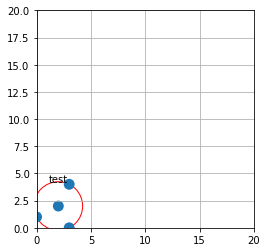

In [346]:
test.draw_circle_marker()

## Маркеры при регистрации

In [347]:
#Инициализируем маркеры. Их начальное положение. Угол поворота = 0
target_car = [[2, 8], [7, 6], [9, 13]]
target_tree = [[12, 8], [17, 5], [19, 13]]

In [348]:
def create_marker(marker_dots, name):
    marker = Marker(Vector(marker_dots[0][0], marker_dots[0][1]), 
                    Vector(marker_dots[1][0], marker_dots[1][1]),
                    Vector(marker_dots[2][0], marker_dots[2][1]), 
                    name)
    return marker

def dots_to_cursors(input_dots):
    input_cursors = []
    for coord in input_dots:
        input_cursors.append(Vector(coord[0], coord[1]))
    return input_cursors

In [382]:
tree_marker = create_marker(target_tree, 'tree')
car_marker = create_marker(target_car, 'car')

In [244]:
input_dots = [[2, 8], [7, 6], [9, 13], [12, 8], [17, 5], [19, 13]]
print('Координаты касаний', input_dots)

Координаты касаний [[2, 8], [7, 6], [9, 13], [12, 8], [17, 5], [19, 13]]


In [351]:
input_cursors = dots_to_cursors(input_dots)
t_list = create_triangles_from_cursors(input_cursors)
len(t_list)

6

## Поиск маркера из списка треугольников

In [373]:
registered_markers = [car_marker, tree_marker]

In [372]:
def find_marker(t_list, marker, tolerance=EPS):
    #equal_m_list = []
    for t in t_list:
        if compare_triangles(t, marker, tolerance):
            return (Marker(t.v1, t.v2, t.v3, marker.ID + '_current'))
            #equal_m_list.append(Marker(t.v1, t.v2, t.v3, marker.ID + '_current'))
    #return equal_m_list

In [376]:
def find_all_registered_markers(registered_markers, input_dots):
    founded_markers_dict = {}
    input_cursors = dots_to_cursors(input_dots)
    t_list = create_triangles_from_cursors(input_cursors)
    for m in registered_markers:
        founded_markers_dict[m.ID] = find_marker(t_list, m)
    return founded_markers_dict

In [385]:
found_markers = find_all_registered_markers(registered_markers, input_dots)

In [386]:
pprint(found_markers)

{'car': <__main__.Marker object at 0x000001FA5EDD7DA0>,
 'tree': <__main__.Marker object at 0x000001FA5EDD7898>}


three


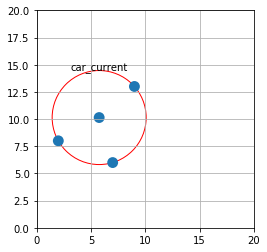

three


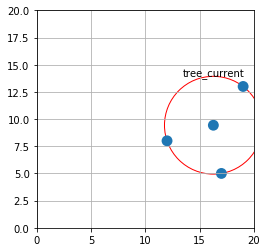

In [387]:
for m in found_markers.values():
    m.draw_circle_marker()

## Центр маркера это его положение

In [388]:
for m in found_markers.values():
    print(m.ID, m.center)

car_current x: 5.756410256410256 y: 10.14102564102564
tree_current x: 16.26086956521739 y: 9.434782608695652


## Сравнение углов в начале и в конце

In [370]:
def marker_rotation_angle(marker, current_marker):
    old_angle = calc_angle(UNIT_VECTOR, marker.v3-car_marker.v1)
    new_angle = calc_angle(UNIT_VECTOR, current_marker.v3-now_car_marker.v1)
    result = clockwise_difference_between_angles(old_angle, new_angle)
    print("Маркер повернут на ", result, "радиан")
    return result

In [389]:
marker_rotation_angle(car_marker, found_markers['car'])

Первый вектор: x: 0 y: 1
Второй вектор: x: 7 y: 5
радианы: 0.9505468408120751
Первый вектор: x: 0 y: 1
Второй вектор: x: 7 y: 5
радианы: 0.9505468408120751
Маркер повернут на  0.0 радиан


0.0